# Regression - Vorlesung

**Themenüberblick:** 

- Problemstellung: Ausgleichsgerade, überbestimmtes Gleichungssystem, kleinste Fehlerquadratsumme
- Matrixformulierung: OLS-Fit und -Formel
- Geometrie: orthogonale Projektion, Eindeutigkeit der Lösung
- Anwendungen: Prognose, polynomialer Fit, Transformationen, allgemeine quadratische Zielfunktionen, Lösen von Gleichungssystemen

**zusätzliche Unterlagen:** `7_Quadratische_Optimierung_Regression-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Problemstellung

**Beispiel: Ausgleichsgerade**

Wir beginnen mit dem klassischen Beispiel des Fits einer Geraden durch $n$ Datenpunkte.

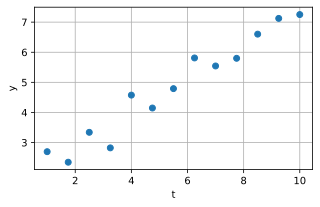

In [2]:
n = 13                       # number of data points
t = linspace(1, 10, num = n) # time points measurements
noise = 0.4*randn(n)         # noise in measurement values 
y = 2 + 0.5*t + noise        # measurement values: line + noise 

figure(figsize=(5,3))
plot(t, y, 'o')
xlabel('t')
ylabel('y')
grid(True)

*Ziel:* Fit einer Geraden $y(t) = d + kt$ durch die Datenpunkte $(t_i,y_i)$, sodass der "Fehler", der noch zu definieren ist, klein ist. In anderen Worten: Finde die "optimalen" Werte für $d$ und $k$ aus den Datenpunkten.

*Vorgehensweise:* Wir formulieren das lineare Gleichungssystem

$$\begin{align}
d + kt_1 & = y_1 \\
d + kt_2 & = y_2 \\
\vdots   & = \vdots \\
d + kt_n & = y_n
\end{align}$$

für die zwei unbekannten Größen $d$ und $k$ als Matrixgleichung $Ax=b$:

$$\begin{pmatrix} 1 & t_1 \\ 1 & t_2 \\ \vdots & \vdots \\ 1 & t_n \end{pmatrix} \begin{pmatrix} d \\ k \end{pmatrix} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}.$$

Das lineare Gleichungssystem ist typischer Weise nicht lösbar, da meist keine Gerade durch alle Datenpunkte legbar ist. Stattdessen soll der "Fehler" minimiert werden. Wir definieren als $i$-ten Einzelfehler $e_i$ die $y$-Differenz zwischen dem Fit $\hat{y}_i := d + kt_i$ und dem zugehörigen Datenwert $y_i$, d. h., $e_i = d + kt_i - y_i$. Der Fehlervektor $e$ besteht aus allen $n$ Einzelfehlern. In Matrixnotation lässt er sich leicht durch $e = Ax - b$ berechnen. 
Wir verlangen, dass der Fehlervektor minimale Länge haben soll.
Das heißt $\lVert e \rVert = \sqrt{e_1^2 + e_2^2 + \ldots + e_n^2}$ soll minimal sein, was äquivalent ist zu $\lVert e \rVert^2 = e_1^2 + e_2^2 + \ldots + e_n^2$ soll minimal sein. In Matrixnotation:  $\lVert e \rVert = \lVert Ax - b \rVert$.
Diese Vorgehensweise heißt "Methode der kleinsten Fehlerquadrate", andere Bezeichnungen sind "Regression" und "least squares".

## Matrixformulierung

**Formulierung des allgemeinen Optimierungsproblems:**

Das obige Optimierungsproblem läßt sich in Matrixform schreiben als 

$$\text{min. } \lVert Ax - b \rVert.$$

Umgekehrt wird jedes Optimierungsproblem, das sich als $\text{min. } \lVert Ax - b \rVert$ schreiben läßt auch als Regressionsproblem bezeichnet.

*Hinweis:* Die Probleme $\text{min. } \lVert Ax - b \rVert$ und $\text{min. } \lVert Ax - b \rVert^2$ sind äquivalent.

**Lösung in Matrixform:** 

Falls der Rang der Matrix $A$ maximal ist, dann hat das Regressionsproblem die eindeutige Lösung

$$\hat{x} = (A^T A)^{-1}A^T b.$$

Der optimale Vektor $\hat{x}$ ist auch Lösung des Gleichungssystems 

$$A^T A \hat{x} = A^T b.$$

Die Gleichungen dieses Gleichungssystems heißen Normalgleichungen.

**Lösungsvarianten in Python:**

- über die Formel $\hat{x} = (A^T A)^{-1}A^T b$
- Lösen der Normalgleichungen mit `solve`
- mit dem Befehl `lstsq`

In [3]:
col_of_ones = ones(n)
A = stack((col_of_ones, t), axis=1)
b = y.reshape(13,1)

# print(A)
# print(b)

In [4]:
# via Formel
x_hat_1 = inv(A.T @ A) @ A.T @ b
print(x_hat_1)

# via Normalgleichungen
x_hat_2 = solve(A.T @ A, A.T @ b)
print(x_hat_2)

# via lstsq
x_hat_3 = lstsq(A, b, rcond=None)[0]
print(x_hat_3)

[[1.74228449]
 [0.56238053]]
[[1.74228449]
 [0.56238053]]
[[1.74228449]
 [0.56238053]]


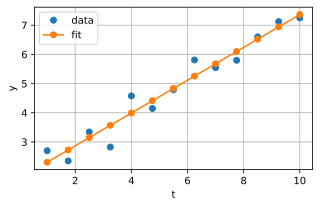

In [5]:
# Fit A*x_hat:
y_hat = A @ x_hat_1     # same as y_hat = x_hat_1[0] + x_hat_1[1]*t 

figure(figsize=(5,3))
plot(t, y, 'o', label='data')
plot(t, y_hat, 'o-', label='fit')
xlabel('t')
ylabel('y')
legend(loc='best')
grid(True)

## Geometrie

**Orthogonale Projektion:**

Wir betrachten das Matrixprodukt $Ax$ als Linearkombination der $m$ Spalten $a_i$ von $A$ mit den Komponenten von $x$:

$$Ax = x_1 a_1 + x_2 a_2 + \ldots + x_m a_m$$

Diese Linearkombination der Vektoren $a_i$ im $\mathbb{R}^n$ soll durch optimale Wahl der $x_i$ dem Vektor $b\in\mathbb{R}^n$ möglichst nahe kommen, sodass der Differenzvektor $e = Ax-b$ eine minimale Länge hat.

Für den Fall $n=3$ und $m=2$ läßt sich die Situation wie folgt grafisch darstellen:

![regression_geometrie.png](abbildungen/regression_geometrie.png)

Die Abbildung suggeriert, dass die optimale Linearkombination der orthogonalen Projektion von $b$ auf die von den Spalten $a_i$ aufgespannte Ebene entspricht. 

Wir zeigen nun, dass diese Intuition in allen Dimensionen $n$ und $m$ stimmt, sofern der Rang der Matrix $A$ maximal ist und deshalb $A^T A$ invertierbar ist. Dazu überprüfen wir, ob der Fit $A\hat{x}$ und der Fehler $e=A\hat{x}-b$ rechtwinklig sind, indem wir das innere Produkt der beiden berechnen:

$$\begin{align}
(A\hat{x})^Te & = \hat{x}^T A^T(A\hat{x}-b) \\
              & = \hat{x}^T A^T (A (A^T A)^{-1} A^T b - b) \\
              & = \hat{x}^T A^T A (A^T A)^{-1} A^T b - \hat{x}^T A^T b \\
              & = \hat{x}^T A^T b - \hat{x}^T A^T b = 0.
\end{align}$$

**Bemerkungen:**

- Wenn die Spalten $a_i$ von $A$ linear unabhängig sind und dadurch der Rang von $A$ maximal ist, dann ist jeder Vektor in der von den Spalten aufgespannten linearen Hülle eindeutig als Linearkombination der Spalten schreibbar. Der optimale Fit $A\hat{x}$ ist als orthogonale Projektion in diese lineare Hülle somit eindeutig als Linearkombination der Spalten schreibbar. Die Linearkombinationskoeffizienten $\hat{x}_i$, die die Lösung $\hat{x}$ bilden, sind in diesem Fall also eindeutig.  
- Im Fall, dass die Spalten linear abhängig sind und dadurch der Rang von $A$ nicht maximal ist, gibt es immer noch einen eindeutigen optimalen Fit durch die orthogonale Projektion in die lineare Hülle der Spalten, aber er ist nicht eindeutig als Linearkombination der Spalten schreibbar. Es gibt dann unendlich viele optimale $\hat{x}$, die alle denselben optimalen Fit $A\hat{x}$ bilden.

## Anwendungen

**Prognose:**

Regressionen werden sehr oft für Prognosen verwendet: Die Spalten der $n\times m$ Matrix $A$ bilden dabei die jeweils $n$ historischen Werte der $m$ erklärenden Größen. Nach dem Fit an die $n$ historischen Werte $b$ der zu erklärenden Größe stehen die optimalen Koeffizienten im Vektor $\hat{x}$ zur Verfügung. Damit können neue Werte der zu erklärenden Größe berechnet werden, indem die zugehörigen neuen Werte der $m$ erklärenden Größen mit den Koeffizienten des Vektors $\hat{x}$ multipliziert werden.

In [6]:
t_new = array([11, 12, 13])
col_of_ones_new = ones(3)
A_new = stack((col_of_ones_new, t_new), axis=1)
y_new = A_new @ x_hat_1    # same as y_new = x_hat_1[0] + x_hat_1[1]*t_new

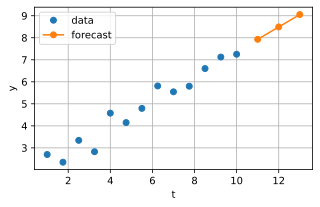

In [7]:
figure(figsize=(5,3))
plot(t, y, 'o', label='data')
plot(t_new, y_new, 'o-', label='forecast')
xlabel('t')
ylabel('y')
legend(loc='best')
grid(True)

**Polynomialer Fit:**

Verallgemeinerung der Ausgleichsgerade als Polynom 1. Ordnung auf z. B. Polynome 3. Ordnung mit gesuchten Koeffizienten $c_0$, $c_1$, $c_2$ und $c_3$:

$$\begin{align}
c_0 + c_1 t_1 + c_2 t_1^2 + c_3 t_1^3 & = y_1 \\
c_0 + c_1 t_2 + c_2 t_2^2 + c_3 t_2^3 & = y_2 \\
\vdots                                & = \vdots \\
c_0 + c_1 t_n + c_2 t_n^2 + c_3 t_n^3 & = y_n
\end{align}$$

als Matrixgleichung $Ax=b$:

$$\begin{pmatrix} 1 & t_1 & t_1^2 & t_1^3 \\ 1 & t_2 & t_2^2 & t_2^3 \\ \vdots & \vdots \\ 1 & t_n & t_n^2 & t_n^3 \end{pmatrix} \begin{pmatrix} c_0 \\ c_1 \\ c_2 \\c_3 \end{pmatrix} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$$

Die optimalen Koeffizienten sind Lösung des Regressionsproblems $\text{min. } \lVert Ax - b \rVert$.

**Transformationen:**

Beispiel: Das exponentielle Wachstumsmodell

$$n(t) = \alpha^{t - t_0}$$

mit unbekannten Parametern $\alpha$ und $t_0$ kann durch Logarithmieren zu einem linearen Modell 

$$\begin{align}
\log(n(t)) & = (t - t_0) \log(\alpha) \\
\log(n(t)) & = -t_0 \log(\alpha) + \log(\alpha)t
\end{align}$$

transformiert werden. Das resultierende lineare Modell kann als Ausgleichsgerade mittels Regression behandelt werden. Dabei entspricht $d=-t_0 \log(\alpha)$ und $k=\log(\alpha)$.

**Quadratische Zielfunktionen:**

Jede quadratische, skalare Zielfunktion $g(x)$ mit $x\in\mathbb{R}^n$ kann (bis auf einen für die Optimierung irrelevanten additiven Term) in der Regressionsform $\lVert Ax - b \rVert^2$ geschrieben und somit mittels Regression behandelt werden.

Beispiel: 

$$\begin{align}
g(x_1, x_2) =& 13 x_1^2 - 30 x_1 x_2 + 18 x_2^2 + 14 x_1 - 12 x_2 + 10 \\
=& \lVert 
\begin{pmatrix}
 2 & -3 \\
-3 &  3 \\
\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} - \begin{pmatrix} 1 \\ 3 \end{pmatrix}
\rVert^2
\end{align}$$

**Lösen von Gleichungssystemen:**

Für ein lineares Gleichungssystem $Ax=b$ liefert die Regressionslösung $\hat{x}$ eine Lösung, falls $Ax=b$  mindestens eine Lösung hat. Falls keine Lösung existiert, liefert die Regressionslösung $\hat{x}$ keine Lösung des lineares Gleichungssystem $Ax=b$ sondern die Least-Squares-Approximation!